# DCGAN TF GAN

In [ ]:
import tensorflow_gan as tfgan
import acgan
import tensorflow as tf
from tensorflow_gan.examples.cifar import networks
from acgan.benchmark.dcgan import DCGAN

import matplotlib.pyplot as plt
import numpy as np

hparams = {
    'embedding_size': 64,
    'batch_size': 32,
    'generator_lr': 0.0002,
    'discriminator_lr': 0.0002,
    'master': '',
    'train_log_dir': '/tmp/tfgan_logdir/cifar/',
    'ps_replicas': 0,
    'task': 0
}

In [3]:
x_sim = DCGAN.load_generator(
    '/tmp/tfgan_logdir/cifar/model.ckpt-428142',
    params=hparams)

INFO:tensorflow:Restoring parameters from /tmp/tfgan_logdir/cifar/model.ckpt-428142


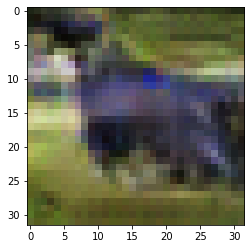

In [38]:
plt.imshow(((x_sim.eval()+1.0)/2.0)[0, ...])

In [10]:
from acgan.benchmark.metrics import InceptionScore
inception = InceptionScore()
x_norm = tf.image.resize(x_sim, (299, 299))

output = inception.run(x_norm, max_eval=50000)

  0%|          | 0/50000 [00:00<?, ?it/s]


Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use keras.layers.flatten instead.



50016it [02:17, 364.39it/s]                           


In [11]:
print(output)

(6.180996, 0.05822315)
